## ANALYSIS

Charts in this analysis provide an overview of the property market, highlighting differences in agent performance, regional price trends, and the relationship between property values and distance from the city centre.

1. High Volume Sellers (Top 5 Agents) – Bar Chart
•	The chart shows the top 5 property agents in terms of total sales (AUD).
•	Jellis leads with the highest sales volume, followed closely by Nelson, indicating their dominance in the market.
•	This suggests that Jellis and Nelson may have access to higher-priced properties or a more active market reach compared to others.

2. Top 5 Agents by Total House Sold – Bar Chart
•	The agents are ranked by the number of houses sold.
•	Nelson tops this chart, which is consistent with the earlier chart on sales volume.
•	Jellis follows, but there is a shift here—hockingstuart appears third by the number of properties sold.
•	This difference may suggest that hockingstuart sells a large number of properties at lower prices.

3. Bottom 5 Agents by Total Sales – Bar Chart
•	The chart highlights the agents with the lowest sales volumes.
•	Rosin and hockingstuart/Advantage are at the bottom.
•	This chart helps identify agents that might have lower-value properties or smaller market presence.

4. Highest Average Sale Price (Top 5 Agents)  - Bar Chart
•	Weast has the highest average sales price per property, suggesting a focus on higher-end or luxury properties.
•	Darras, VicProp, Sotheby’s, and Lucas are close behind, which aligns with the expectation of these agents targeting premium markets.

5. House Sold per Year (Percentage) – Pie Chart
•	A pie chart showing the percentage of houses sold in 2016 and 2017.
•	53.4% of houses were sold in 2017, while 46.6% were sold in 2016.
•	This indicates a slightly more active housing market in 2017.

6. House Sold per Year with Subcategories (Type) – Pie Chart with sub charts
•	A detailed pie chart with a breakdown of property types sold in 2016 and 2017.
•	In both years, houses (h) make up the majority of sales, followed by units (u) and townhouses (t).
•	2017 shows a higher percentage of house sales than in 2016, which might suggest increased demand for traditional housing over other types.

7. Properties Sold by Type per Year – Bar Chart
•	A bar chart comparing the number of houses, units, and townhouses sold in 2016 and 2017.
•	Houses (h) dominate in both years, but there’s a significant increase in 2017 compared to 2016.

8. House Distribution by Region - Boxplot
•	This boxplot shows the distribution of properties by distance from the Central Business District (CBD) for all 8 regions.
•	Properties in the Western Metropolitan and Eastern Metropolitan regions are, on average, closer to the city center.
•	Eastern Victoria and Northern Victoria regions have properties farther from the CBD.
9. House Price Distribution by Region - Boxplot
•	The boxplot shows the distribution of house prices by region.
•	Southern Metropolitan region has the highest median house prices, with many outliers in higher price ranges.
•	Northern Metropolitan and Western Metropolitan also have higher price ranges compared to regions like Eastern Victoria and Western Victoria, where house prices are generally lower.
•	This suggests that regions closer to the CBD tend to have higher property values.

10. Price vs Distance from the CBD – Scatter Plot
•	A scatter plot showing the relationship between house prices and distance from the CBD.
•	There is a clear trend: houses closer to the CBD tend to have higher prices, with a significant number of high-priced properties within a 10km radius.
•	As the distance from the CBD increases, house prices generally decrease.

Summary of Key Insights:
•	Agent Performance: Jellis and Nelson are the leading agents in terms of total sales and houses sold. 
•	Luxury Market: Agents like Weast and Darras dominate the luxury market, with the highest average property prices.
•	Property Type: Houses remain the most popular property type, with increasing demand in 2017 compared to 2016.
•	Regional Differences: There is a clear difference in property values by region, with Southern Metropolitan being the most expensive and regions farther from the city center, like Northern and Eastern Victoria, having lower prices.
•	Distance and Price Correlation: Properties closer to the CBD command higher prices.


In [1]:
import os
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import linregress

In [2]:
#to find the path
melb_data = Path ("melb_data1fixed.csv")

In [3]:
#to read the file
melhousing_date = pd.read_csv(melb_data)
melhousing_date.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lat,Long,Regionname,Propertycount,Year
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,12/3/2016,2.5,3067,...,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,2016.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2/4/2016,2.5,3067,...,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,2016.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,3/4/2017,2.5,3067,...,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,2017.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,3/4/2017,2.5,3067,...,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,2017.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,6/4/2016,2.5,3067,...,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,2016.0


In [6]:
#count the rows for each column
melhousing_date.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
BuildingArea      7130
YearBuilt         8205
CouncilArea      12212
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [7]:
#to drop the column that has a lot of empty row to avoid bias analysis
melhousingclean_df=melhousing_df.drop(["BuildingArea","YearBuilt"],axis=1)
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      12212
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [8]:
#to fill the row that has empty row with the value in the row before
melhousingclean_df[['CouncilArea', 'Car']] = melhousingclean_df[['CouncilArea', 'Car']].fillna(method='ffill')

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_4341/3496885142.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  melhousingclean_df[['CouncilArea', 'Car']] = melhousingclean_df[['CouncilArea', 'Car']].fillna(method='ffill')


In [9]:
#to check all the columns has the same number of row data
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13580
Landsize         13580
CouncilArea      13580
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [10]:
#change the date colummn data type from object to datetime
#melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'], dayfirst=True)
print(melhousingclean_df['Date'].dtype)

object


In [11]:
#to create the new column with the right data type for date
#melhousingclean_df['FormattedDate'] = melhousingclean_df['Date'].dt.strftime('%m/%d/%Y')
#print(melhousingclean_df['FormattedDate'])
#melhousingclean_df.head(10)

In [12]:
#delete the old column for date
#del melhousingclean_df['Date']
#melhousingclean_df.head()

In [13]:
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13580
Landsize         13580
CouncilArea      13580
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [14]:
#visualize the data using bar and pie
#to find top 5 agent by volume price and bottom 5 agent, to find how many houses the agent sold

In [15]:
#to rename to colomn
melhousingclean_df.rename(columns={'SellerG' : 'PropertyAgent'}, inplace=True)
melhousingclean_df

,Suburb,Address,Rooms,Type,Price,Method,PropertyAgent,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lat,Long,Regionname,Propertycount,Year
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,12/3/2016,2.5,3067,2,1,1.0,202,Yarra,-37.79960,144.99840,Northern Metropolitan,4019,2016.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2/4/2016,2.5,3067,2,1,0.0,156,Yarra,-37.80790,144.99340,Northern Metropolitan,4019,2016.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,3/4/2017,2.5,3067,3,2,0.0,134,Yarra,-37.80930,144.99440,Northern Metropolitan,4019,2017.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,3/4/2017,2.5,3067,3,2,1.0,94,Yarra,-37.79690,144.99690,Northern Metropolitan,4019,2017.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,6/4/2016,2.5,3067,3,1,2.0,120,Yarra,-37.80720,144.99410,Northern Metropolitan,4019,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,8/26/2017,16.7,3150,4,2,2.0,652,Maribyrnong,-37.90562,145.16761,South-Eastern Metropolitan,7392,2017.0
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,8/26/2017,6.8,3016,3,2,2.0,333,Maribyrnong,-37.85927,144.87904,Western Metropolitan,6380,2017.0
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,8/26/2017,6.8,3016,3,2,4.0,436,Maribyrnong,-37.85274,144.88738,Western Metropolitan,6380,2017.0
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,8/26/2017,6.8,3016,4,1,5.0,866,Maribyrnong,-37.85908,144.89299,Western Metropolitan,6380,2017.0


In [16]:
total_house_sold = melhousingclean_df['Address'].count()
print (f"Total of house sold is : {total_house_sold}")

Total of house sold is : 13580


In [18]:
duplicate_address_data = melhousingclean_df.loc[melhousingclean_df["Address"].isin(['7 Wallace St', '16 Park Rd', '7 Victoria St', '69 Victoria St', '8 Vickery St'])]
print(duplicate_address_data)


              Suburb         Address  Rooms Type    Price Method  \
827   Bentleigh East    7 Wallace St      3    h  1355000      S   
3731       Maidstone    7 Wallace St      3    h   721000      S   
4818         Prahran      16 Park Rd      3    t  1245000     PI   
5780        St Kilda   7 Victoria St      3    h  2000000     VB   
6123    Surrey Hills      16 Park Rd      2    h  1018000      S   
6495    Williamstown   7 Victoria St      4    h  2640000      S   
7769          Coburg  69 Victoria St      3    t   720000     PI   
7770          Coburg  69 Victoria St      3    t   720000     PI   
9793       Bentleigh    8 Vickery St      5    h  1900000     VB   
9948    Malvern East    8 Vickery St      4    h  3600000      S   

          PropertyAgent       Date  Distance  Postcode  Bedroom2  Bathroom  \
827              Buxton  10/8/2016      13.9      3165         0         1   
3731  Sweeney/Advantage  10/8/2016       9.2      3012         2         2   
4818           Ma

In [19]:
#to count how many property agents in Melb
melb_agent = melhousingclean_df['PropertyAgent'].value_counts()
melb_agent

PropertyAgent
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: count, Length: 268, dtype: int64

In [20]:
#to find top 5 most selling agents
#identifying high-volume sellers by price
melb_agent_total = melhousingclean_df.groupby('PropertyAgent')['Price'].sum().sort_values(ascending=False).head(5)
melb_agent_total

PropertyAgent
Jellis           1800503098
Nelson           1588438150
Marshall         1244748138
hockingstuart    1114166699
Barry             885942476
Name: Price, dtype: int64

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_4341/2488675089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=melb_agent_total.index, y=melb_agent_total.values, palette='magma')


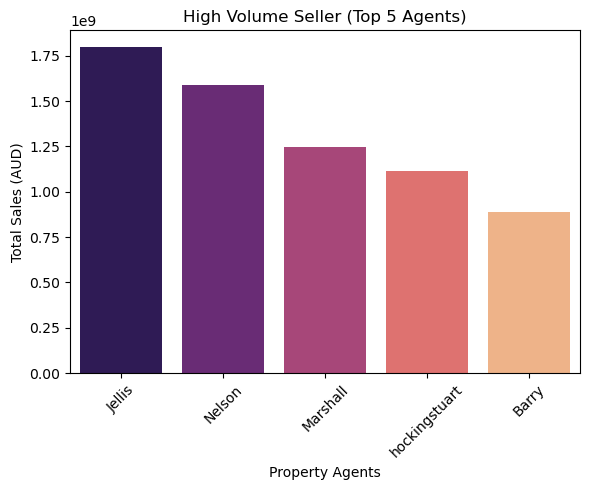

In [21]:
#chart for top 5 most selling agents
plt.figure(figsize=(6, 5))
sns.barplot(x=melb_agent_total.index, y=melb_agent_total.values, palette='magma')

plt.title('High Volume Seller (Top 5 Agents)')
plt.xlabel('Property Agents')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [22]:
#to count how many houses the agent sold 
top_five = ['Jellis', 'Nelson', 'Marshall', 'hockingstuart', 'Barry']
total_house = melhousingclean_df[melhousingclean_df['PropertyAgent'].isin(top_five)]
melb_agent_total_house = total_house['PropertyAgent'].value_counts()
melb_agent_total_house

PropertyAgent
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Marshall          659
Name: count, dtype: int64

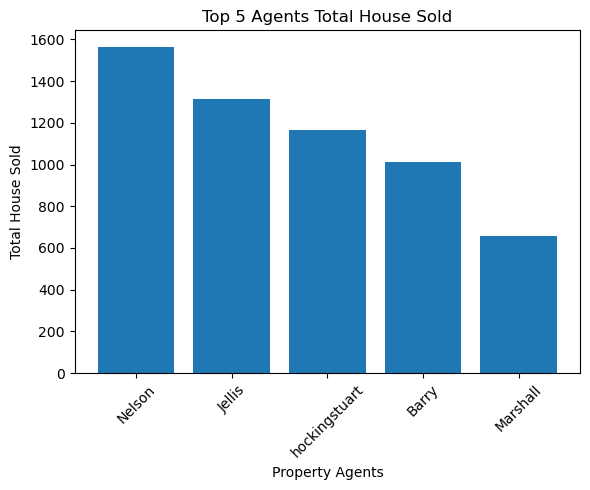

In [23]:
#to show how many houses the agent sold 
plt.figure(figsize=(6, 5))
plt.bar(melb_agent_total_house.index, melb_agent_total_house.values, alpha=1.0, facecolor='#1f77b4', align="center")

plt.title('Top 5 Agents Total House Sold')
plt.xlabel('Property Agents')
plt.ylabel('Total House Sold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [24]:
#identifying bottom 5-volume agents
melb_agent_total_last = melhousingclean_df.groupby('PropertyAgent')['Price'].sum().sort_values(ascending=True).head(5)
melb_agent_total_last

PropertyAgent
Rosin                      330000
hockingstuart/Advantage    330000
hockingstuart/Village      345000
Wood                       370000
Oak                        380000
Name: Price, dtype: int64

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_4341/3769633204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=melb_agent_total_last.index, y=melb_agent_total_last.values, palette='magma')


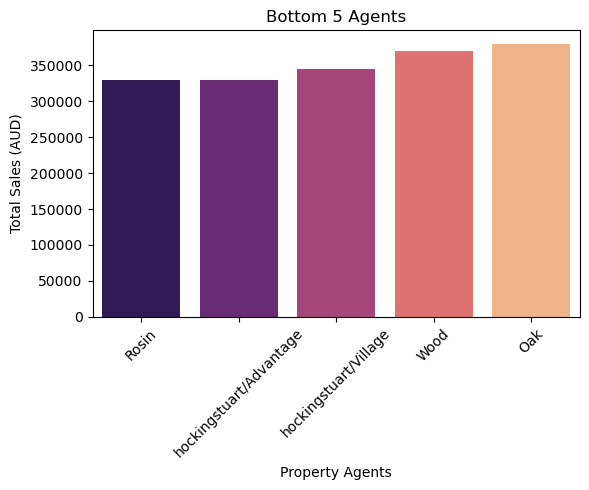

In [25]:
#chart for bottom 5 volume agents
plt.figure(figsize=(6, 5))
sns.barplot(x=melb_agent_total_last.index, y=melb_agent_total_last.values, palette='magma')

plt.title('Bottom 5 Agents')
plt.xlabel('Property Agents')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [26]:
#to count how many house the agent sold for bottom 5
bottom_five = ['Rosin', 'hockingstuart/Advantage', 'hockingstuart/Village', 'Wood', 'Oak']
total_bottom_house = melhousingclean_df[melhousingclean_df['PropertyAgent'].isin(bottom_five)]
melb_agent_bottom_house = total_bottom_house['PropertyAgent'].value_counts()
melb_agent_bottom_house
#there is no need to visualize the data

PropertyAgent
hockingstuart/Advantage    1
Wood                       1
hockingstuart/Village      1
Oak                        1
Rosin                      1
Name: count, dtype: int64

In [27]:
#BONUS INFORMATION
#to find top 5 agent by average total sell
#to represent agents who may deal in higher-end properties, show the possibility that agents sell luxury property
melb_agent_avg = melhousingclean_df.groupby('PropertyAgent')['Price'].mean().sort_values(ascending=False).head(5)
melb_agent_avg

PropertyAgent
Weast        3.320000e+06
Darras       2.950000e+06
VICProp      2.797667e+06
Sotheby's    2.453750e+06
Lucas        2.450000e+06
Name: Price, dtype: float64

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_4341/3130921094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=melb_agent_avg.index, y=melb_agent_avg.values, palette='magma')


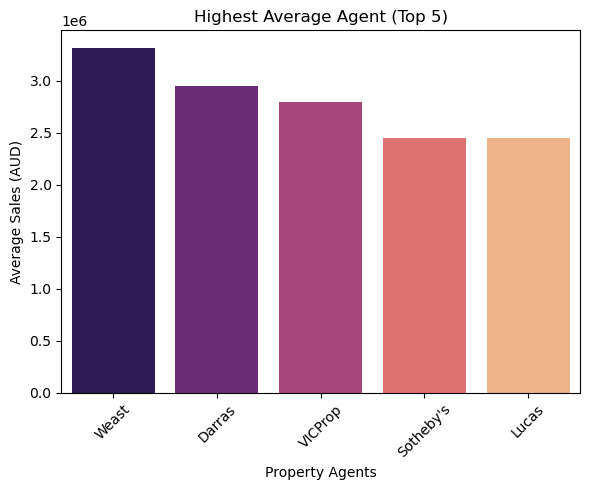

In [28]:
#chart for top 5 agent by average sales
plt.figure(figsize=(6, 5))
sns.barplot(x=melb_agent_avg.index, y=melb_agent_avg.values, palette='magma')

plt.title('Highest Average Agent (Top 5)')
plt.xlabel('Property Agents')
plt.ylabel('Average Sales (AUD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [29]:
#to count how many house the agent sold 
avg_five = ["Weast", "Darras", "VICProp", "Sotheby's", "Lucas"]
avg_total_house = melhousingclean_df[melhousingclean_df['PropertyAgent'].isin(avg_five)]
melb_agent_avg_house = avg_total_house['PropertyAgent'].value_counts()
melb_agent_avg_house
#there is no need to make a visualization of data

PropertyAgent
Sotheby's    6
VICProp      3
Weast        1
Lucas        1
Darras       1
Name: count, dtype: int64

In [30]:
#FIND HOW MANY HOUSES SOLD PER YEAR

In [31]:
#to get the information of NaN row in year column
nan_count = melhousingclean_df['Year'].isna().sum()
nan_count

20

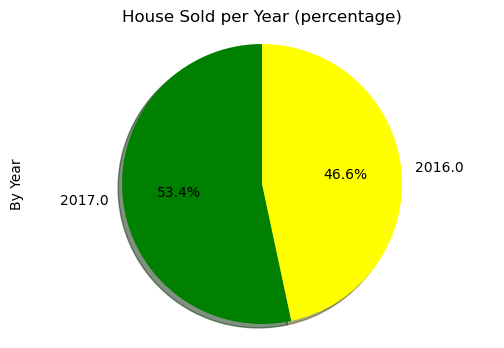

In [32]:
#to find the percentage of house sold in each year with pie chart using pyplot
house_sold_per_year = melhousingclean_df['Year'].value_counts()
#explode=(0.1)

plt.figure(figsize=(6, 4))
plt.pie(house_sold_per_year,
        #explode=explode,
        labels=house_sold_per_year.index, 
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=['green', 'yellow'])

plt.title('House Sold per Year (percentage)')
plt.ylabel('By Year')
plt.axis('equal')
plt.show()

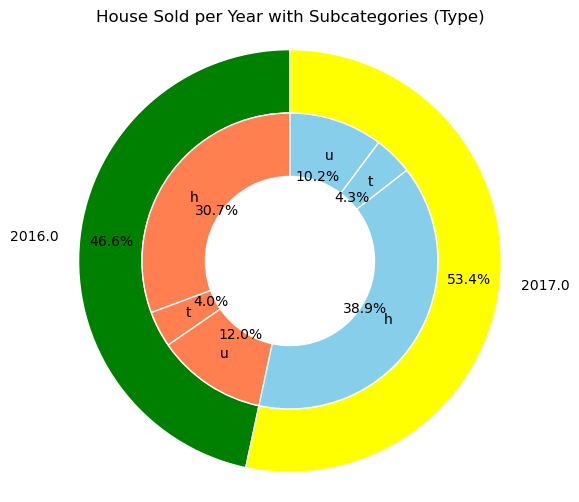

In [33]:
#to visualize the percentage of property types sold for each year
#groupby Year and Type
house_percent = melhousingclean_df.groupby(['Year', 'Type']).size()
inner_colors = ['coral', 'coral', 'coral', 'skyblue', 'skyblue', 'skyblue']

#create the outer and inner pie chart data
outer_labels = house_percent.index.get_level_values(0).unique()  # Years
inner_labels = house_percent.index.get_level_values(1)  # Types
outer_values = house_percent.groupby(level=0).sum()  # Total counts per year
inner_values = house_percent.values  # Counts for each type within the years

#create the nested pie chart
fig, ax = plt.subplots(figsize=(6, 6))

# create the outer pie (for years)
ax.pie(outer_values, labels=outer_labels, radius=1, autopct='%1.1f%%', startangle=90,
       pctdistance=0.85, wedgeprops=dict(width=0.3, edgecolor='w'), colors=['green', 'yellow'])

# create the inner pie (for property types)
ax.pie(inner_values, labels=inner_labels, radius=0.7, autopct='%1.1f%%', startangle=90, 
       labeldistance=0.75, wedgeprops=dict(width=0.3, edgecolor='w'), colors=inner_colors)

# to add title and display the plot
plt.title('House Sold per Year with Subcategories (Type)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

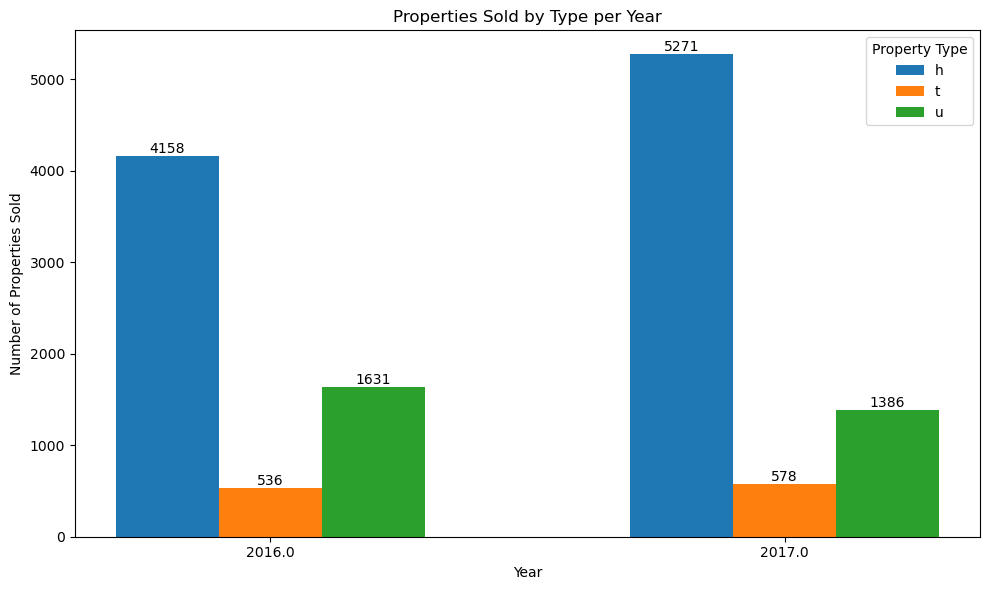

In [34]:
#to visualize how many property types sold for each year in bar plot

# group data by year and type
house_per_year = melhousingclean_df.groupby(['Year', 'Type']).size().reset_index(name='Count')

#plot data, create figure
plt.figure(figsize=(10, 6))

property_types = house_per_year['Type'].unique()
years = house_per_year['Year'].unique()

bar_width = 0.2
positions = list(range(len(years)))

for i, property_type in enumerate(property_types):
    subset = house_per_year[house_per_year['Type'] == property_type]
    bars = plt.bar([p + i * bar_width for p in positions], subset['Count'], width=bar_width, label=property_type)
    
    # to add counts number for each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.title('Properties Sold by Type per Year')
plt.xticks([p + bar_width for p in positions], years)
plt.legend(title='Property Type')

# Display the chart
plt.tight_layout()
plt.show()

In [35]:
#find the relation of house distance from CBD to house price by all 8 regions in Melbourne

In [36]:
#find how many category of distances
distance = melhousingclean_df['Distance'].value_counts()
distance

Distance
11.2    739
9.2     367
13.9    324
7.8     306
4.6     263
       ... 
37.5      1
29.3      1
47.4      1
39.8      1
48.1      1
Name: count, Length: 202, dtype: int64

In [37]:
#find all the region with groupby to see the houses' distance from cbd in that region
region_distance = melhousingclean_df.groupby('Regionname')['Distance'].value_counts()
region_distance

Regionname            Distance
Eastern Metropolitan  13.8        99
                      13.9        89
                      11.8        83
                      7.9         80
                      10.5        60
                                  ..
Western Metropolitan  23.8         2
                      27.7         2
Western Victoria      29.8        19
                      31.7        12
                      37.5         1
Name: count, Length: 285, dtype: int64

In [90]:
region_names = melhousingclean_df['Regionname'].value_counts()
region_names

Regionname
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: count, dtype: int64

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_4341/1610217272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Regionname', y='Distance', data=melhousingclean_df, palette='magma')


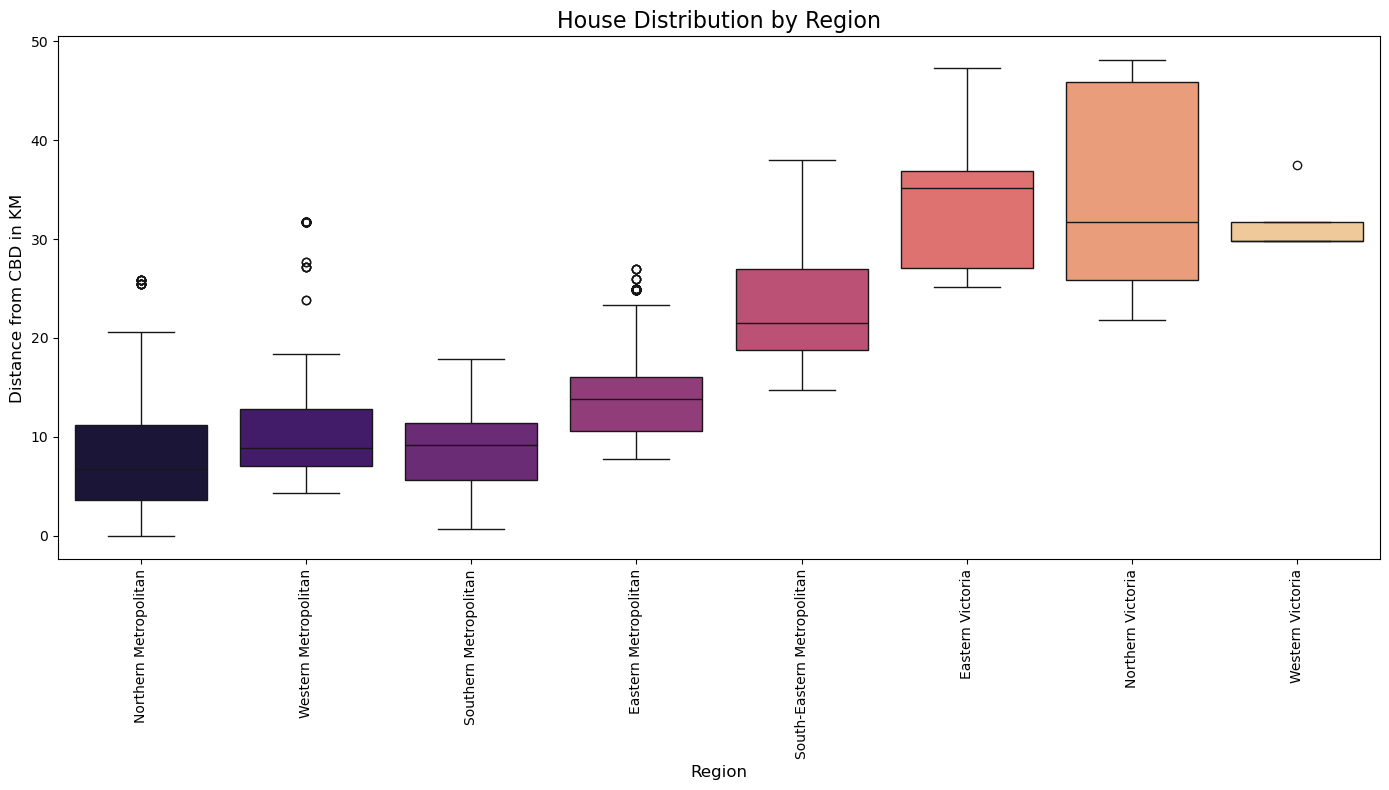

In [39]:
#set the figure
plt.figure(figsize=(14, 8))

#create boxplot
sns.boxplot(x='Regionname', y='Distance', data=melhousingclean_df, palette='magma')

#add title and labels
plt.title('House Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Distance from CBD in KM', fontsize=12)
plt.xticks(rotation=90) 
plt.tight_layout() #to make the layout tidy


#show the plot
plt.show()

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_4341/3750260871.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Regionname', y='Price', data=melhousingclean_df, palette='magma')


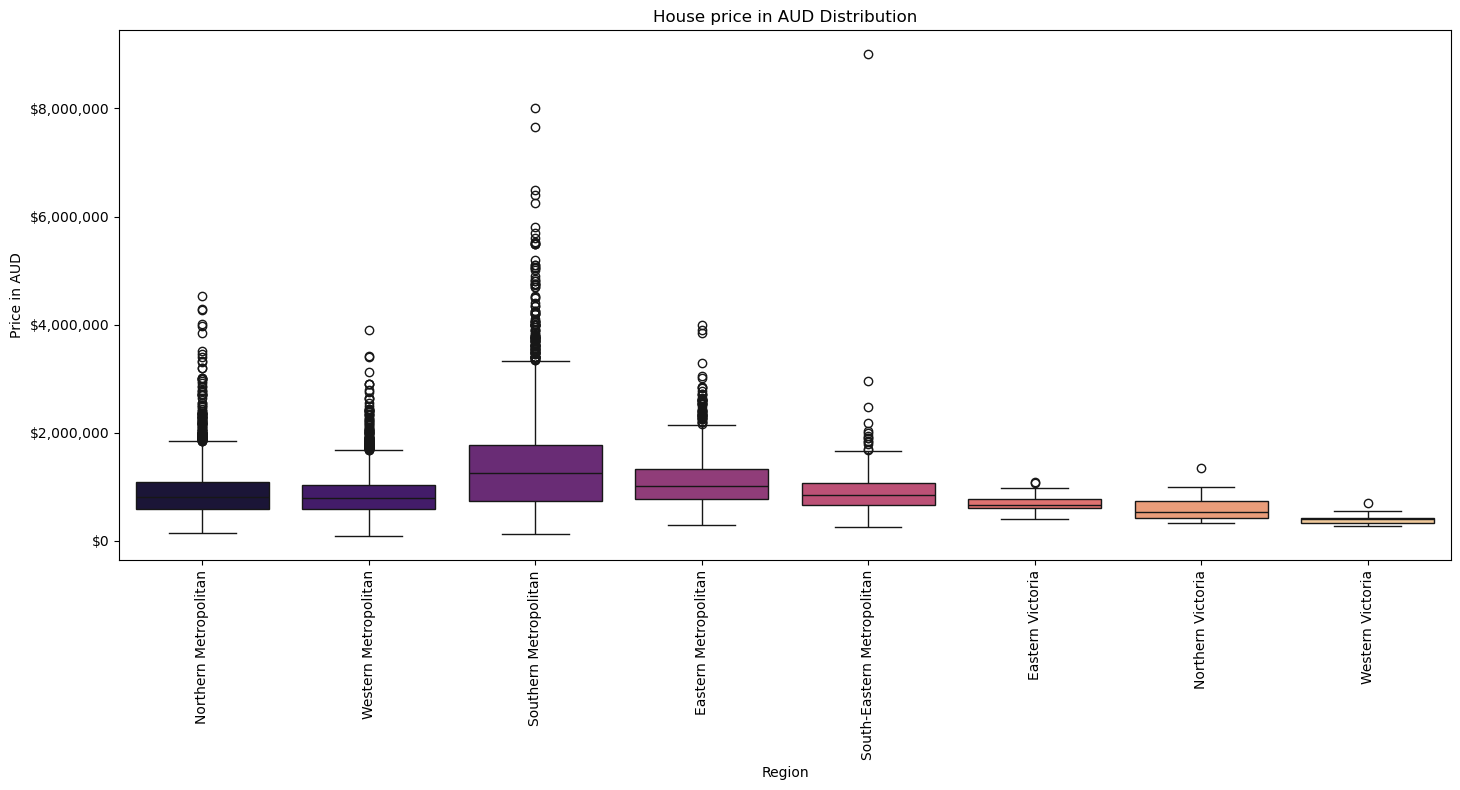

In [40]:
#after we found the distance for each region, we want to know how is the price affected by the distance

# Set figure
plt.figure(figsize=(14, 8))

#create boxplot
sns.boxplot(x='Regionname', y='Price', data=melhousingclean_df, palette='magma')

#add title and labels
plt.title('House price in AUD Distribution')
plt.xlabel('Region')
plt.ylabel('Price in AUD')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}')) #use get current axis to display the numbers as currency

# show the plot
plt.show()

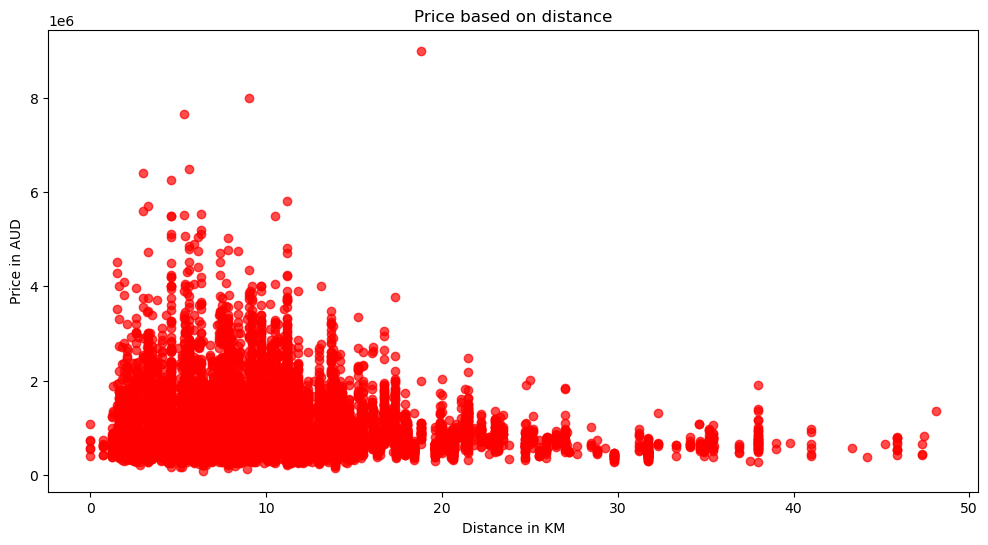

In [41]:
#to create the plot
plt.figure(figsize=(12, 6))
#to create the scatter
plt.scatter(melhousingclean_df['Distance'], melhousingclean_df['Price'], color='red', alpha=0.7)

plt.title('Price based on distance')
plt.xlabel('Distance in KM')
plt.ylabel('Price in AUD')


plt.show()